# Overview

Once again, this week we will continue to use Euler's Method to solve fun problems that we wouldn't be able to solve with pencil and paper. My hope is that since you have been using Euler's method for several weeks, you don't need much of a tutorial on it anymore.  If that isn't true and you still need some guidance, please reach out to me or the TA with your questions.


## The physics

The liftoff of a rocket provides some interesting physics to consider.  Consider the following:

1.  The mass of the rocket + fuel is decreasing as the fuel burns off.  Hence, the acceleration of the rocket is very much not a constant.  Caution: You don't want to decrease the mass of the rocket-fuel system forever or the mass will become lower than the mass of the rocket alone, and eventually will go negative (yikes!)
2. The force of the thrust on the rocket is given by:
$$ F = v_e {dM\over dt}$$
where ${dM\over dt}$ is the rate of mass loss due to the fuel burning and $v_e$ is the speed with which the exhaust exits the rocket.  Can you do a unit analysis on this function and convince yourself that it has the right units?

3. The force of air drag on the rocket is quadratic. In other words, it is given by:
$$F_\text{drag} = {1\over 2} \rho A C v^2$$
where $\rho$ is the density of air, $A$ is the cross-sectional area of the rocket, and $C$ is the drag coefficient. Also notice that the direction of the drag force changes at the peak of the trajectory.  For the upward journey, the drag force points downward, and for the downward part of the journey, the drag force points upward.  To handle this efficiently, I recommend calculating this force like this:
$$ F_D = {1\over 2} \rho A C v |v|$$
so that the sign of this calculation changes naturally at the peak of the trajectory.
 
4.  Since the rocket may travel a considerable distance into the atmosphere, we must take into account that the density of the atmosphere varies with altitude according to:
$$\rho(h) = (1.09 - {0.0065 h\over 300})^{2.5}$$

## Your Problem

A rocket has a total mass $M_i = 180$ kg, including $130$ kg of fuel and oxidizer. The rocket is launched from the ground, starting from rest at time $t = 0$ s, and puts out exhaust with a relative speed of $v_e = 1500$ m/s at a constant burn rate of $2.50$ kg/s. The burn lasts until the fuel runs out. 

Assume a cylindrical rocket with a fuselage radius $r = 20$ cm, and a drag coefficient of $C = 0.5$.  Just like with Felix's jump last week, 

1. Using Euler's method, plot the position vs. time and velocity vs. time graphs for the rocket from the moment it lifts off until it hits the ground again.  Note: We're not modeling a parachute here. 
2. Make sure your code is well commented.
3. Answer the following questions:
             1. How long was the flight?
             2. What is the rocket's impact speed with the ground?
4.  Once you think your simulation is correct, play with some of the key parameters to ensure that the results of your simulation agree with your own intuition.  Here are some things you could try:

              1. Change the mass of the rocket.
              2. Change the mass of the fuel.
              3. Change the exhaust speed of the fuel.
              4. Change the drag coefficient.
              5. Change the size of the rocket (cross-sectional area).
              
              
 Hints:
 
 1. Your code should only have one 'while' loop, not multiple.
 2. The thrust force is only nonzero while there is fuel left.  Once the fuel is gone, the thrust force should go to zero.  To handle this consider using an if/else statement:
 
                     if mTotal > mRocket: # If this is true, then execute the line below
                           Ft = burnRate * ve
                     else:  # Otherwise, execute the line below
                          Ft = 0
     inside your 'while' loop
 3.  The mass of the rocket + fuel system decreases in time, but only while the engine is burning.  So you need to add a statement to your if/else statement:

                     if mTotal > mRocket: # If this is true, then execute the line(s) below
                           Ft = burnRate * ve
                           mTotal = mTotal - burnRate * dt  #<- Add this line to decrease the mass of the system
                     else:  # Otherwise, execute the line below.
                          Ft = 0



The rocket's flight took 185.50 seconds.
The rocket's impact speed was 114.06 m/s.


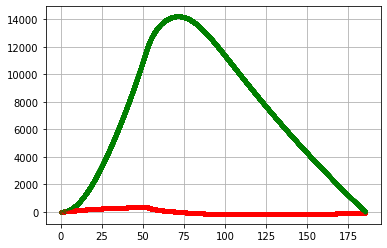

In [14]:
import numpy as np
from matplotlib import pyplot
m = 180
ve = 1500
C = .5
dmdt = 2.5
dt = .01
v = 0
a = 0
r = .2
A = np.pi * r ** 2
h = 0
t = 0

f = ve * dmdt
while h >= 0:
    p = (1.09 - (.0065 * h)/300) ** 2.5

    fg = m * 9.8
    fd = (1/2) * p * A * C * v * np.abs(v)

    a = (f - fd - fg)/ m
    v = a * dt + v
    h = v * dt + h
    t += dt
    if m > 50:
        m = m - dmdt * dt
        f = ve * dmdt
    else:
        f = 0
    pyplot.plot(t , v ,'r.')
    pyplot.plot(t , h , 'g.')
print(f"The rocket's flight took {t:.2f} seconds.")
print(f"The rocket's impact speed was {-v:.2f} m/s.")
pyplot.grid()
pyplot.show()

    